In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import shap
import warnings
warnings.filterwarnings('ignore') # To ignore warning messages
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [2]:
# reading from csv file
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Attribute Information:
## 1-age
## 2-sex
## 3-chest pain type (4 values)
## 4-resting blood pressure
## 5-serum cholestoral in mg/dl
## 6-fasting blood sugar > 120 mg/dl
## 7-resting electrocardiographic results (values 0,1,2)
## 8-maximum heart rate achieved
## 9-exercise induced angina
## 10-oldpeak = ST depression induced by exercise relative to rest
## 11-the slope of the peak exercise ST segment
## 12-number of major vessels (0-3) colored by flourosopy
## 13-thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [3]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

## Check some info about the Dataset to (see nulls and DataTypes)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Checking for missing values

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

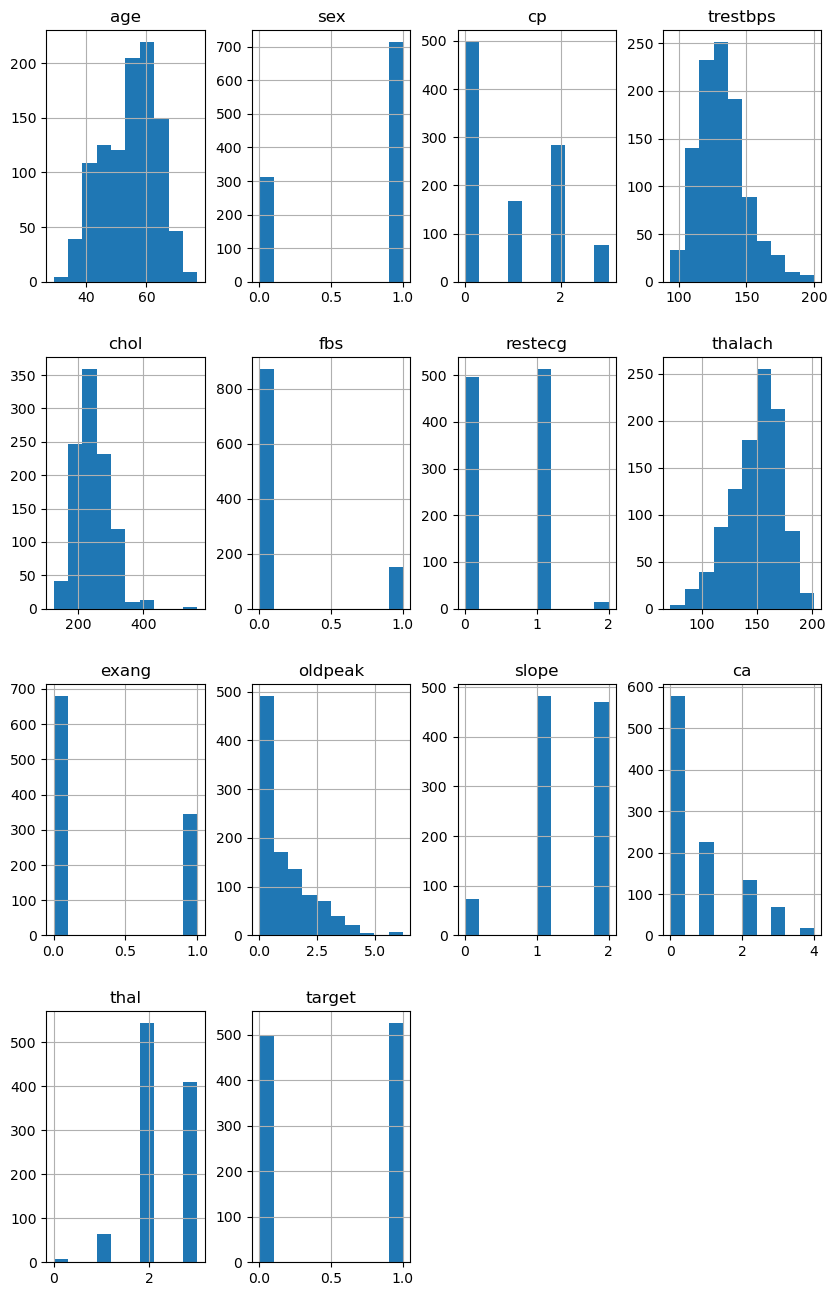

In [6]:
data.hist(figsize= [10,16])

In [7]:
data["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

<AxesSubplot:>

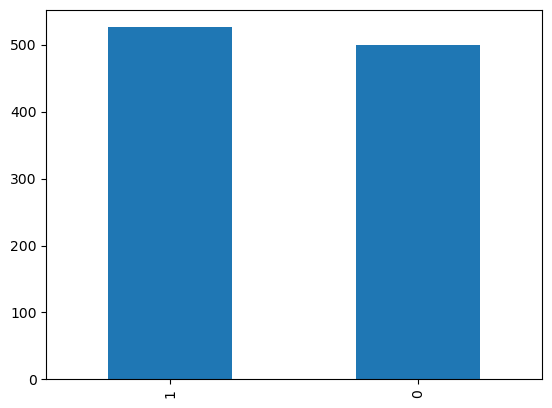

In [8]:
data["target"].value_counts().plot.bar()

## Show some statistics about the Dataset

In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### `Exploratory Data Analysis` (EDA)

### `Univariate Visualization`

### Check the Distribution of (exercise induced angina) Feature in Dataset

In [10]:
exang_values = data['cp'].value_counts(ascending=True)
print('categories of (exang) --- \n', exang_values)


categories of (exang) --- 
 3     77
1    167
2    284
0    497
Name: cp, dtype: int64


## Plotting

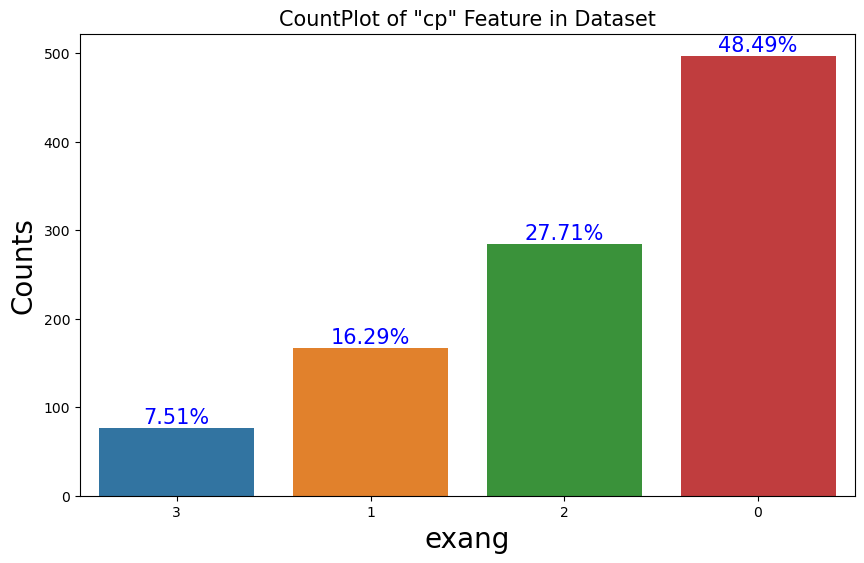

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x='cp', data=data, order=exang_values.index)
plt.title('CountPlot of "cp" Feature in Dataset', fontsize=15, c='k')
plt.xlabel('exang', fontsize=20, c='k')
plt.ylabel('Counts', fontsize=20, c='k')
## To show the percentage of each bar              
for i in range(len(exang_values)):  ## loop over the numbers of categories (number of bars)
    each_count = exang_values.values[i]
    each_text = f'{((100*each_count)/ len(data)):.2f}%'
    plt.text(x=i, y=each_count+5, s=each_text, c='b', fontsize=15, ha='center')


## Scatterplot with important Feature (medina_income) with the target (median_house_value)

## Histogram Distr. of Numerical Features in Dataset

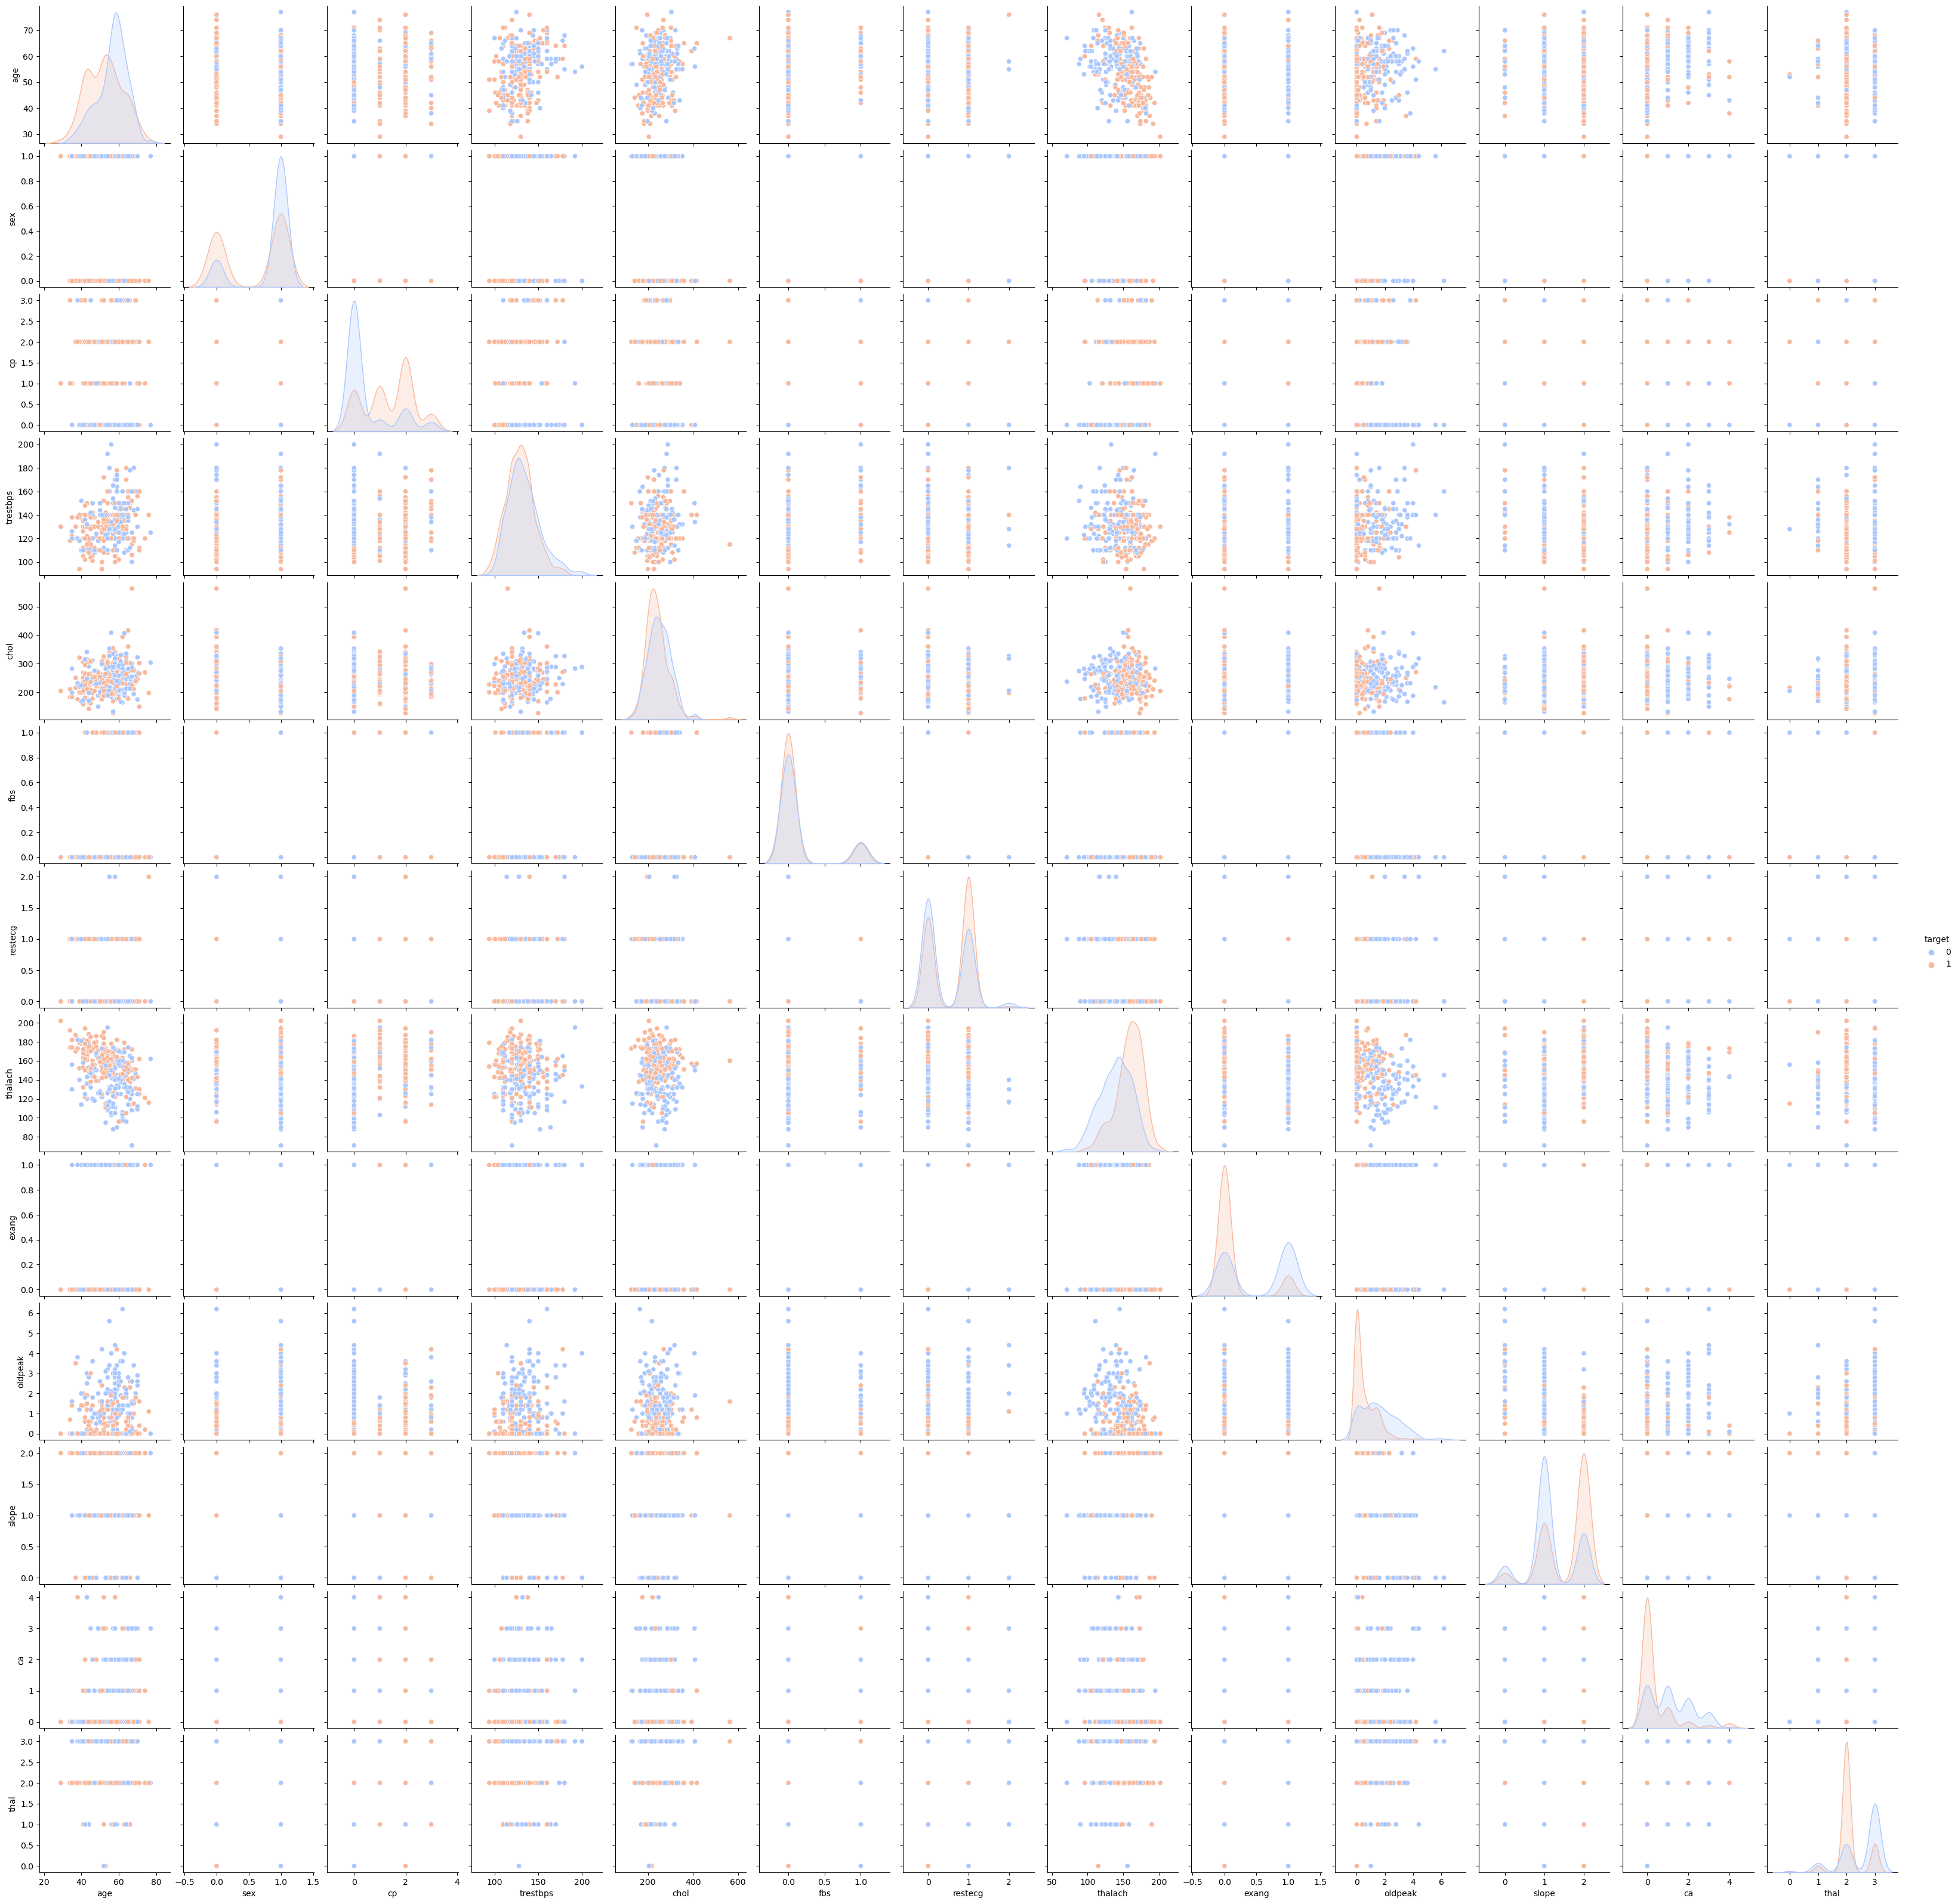

In [12]:
# THIS IS GOING TO BE A VERY LARGE PLOT
sns.pairplot(data,hue='target',palette='coolwarm')

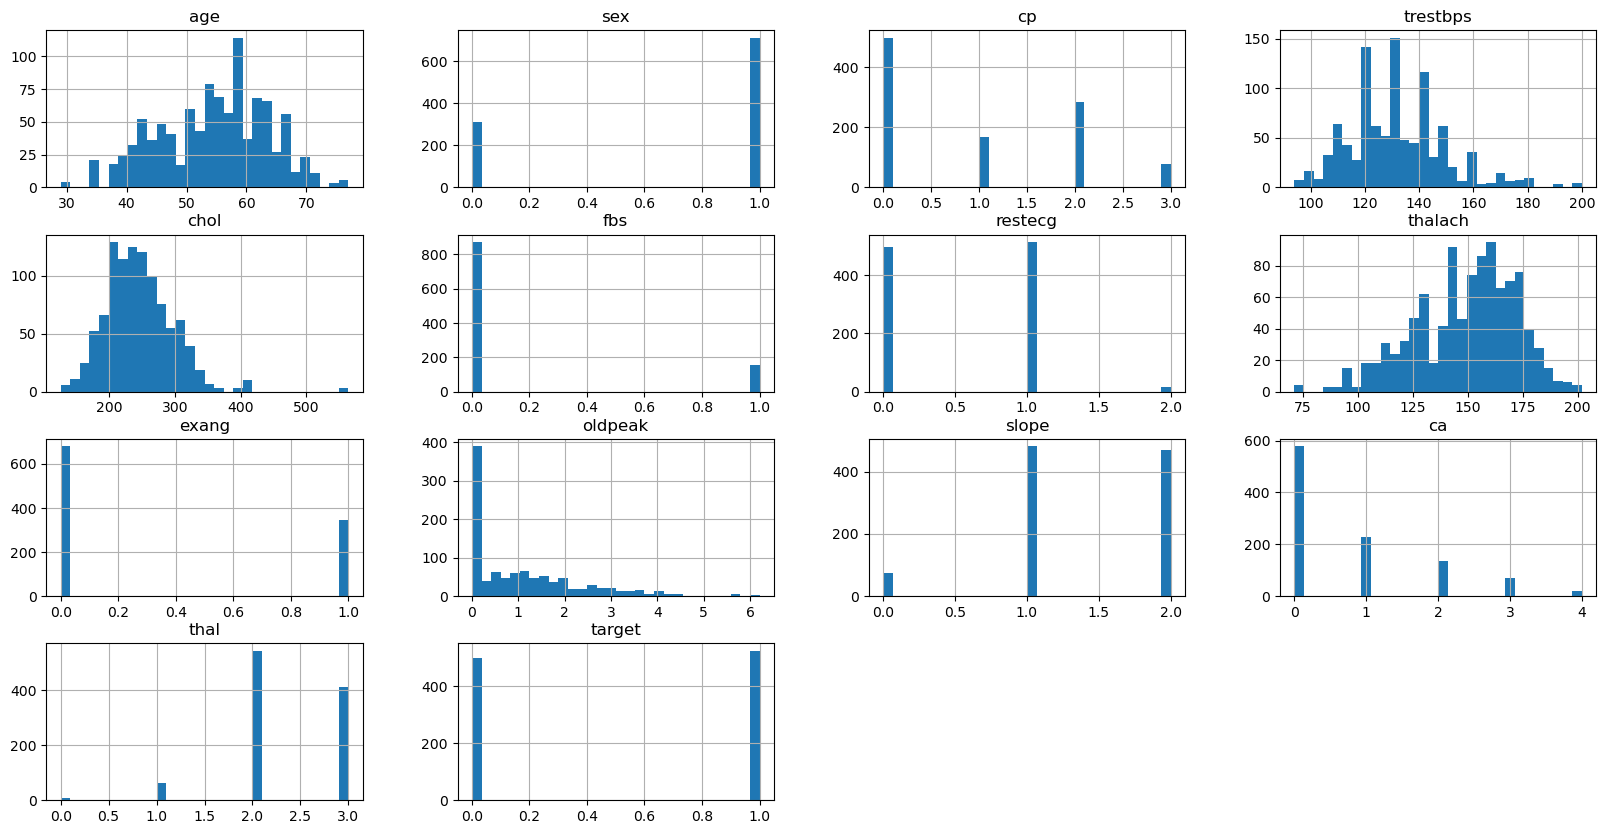

In [13]:
data.hist(bins=30, figsize=(20, 10))
plt.show()

## pearson correlation

In [14]:
## Using pearson correlation
data.corr()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [15]:
data.corr()['thal'].sort_values(ascending=False)

thal        1.000000
oldpeak     0.202672
sex         0.198424
exang       0.197201
ca          0.149014
chol        0.100244
age         0.072297
trestbps    0.059276
restecg    -0.020504
fbs        -0.042177
slope      -0.094090
thalach    -0.098068
cp         -0.163341
target     -0.337838
Name: thal, dtype: float64

## Show This As Heatmap

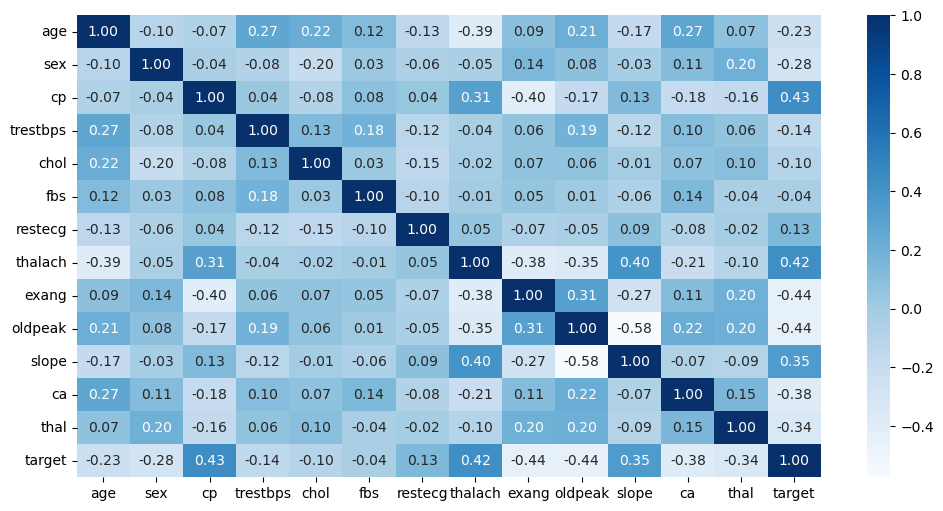

In [16]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='Blues', fmt='.2f')  ## symmetric matrix
plt.show()

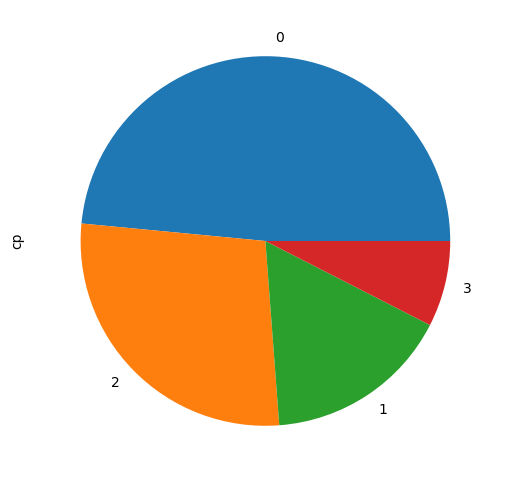

In [17]:
## using pandas
data['cp'].value_counts().plot(kind='pie', figsize=(10, 6));

## The Modiling
## 1-KNN CLASSIFIER

### `Feature Engineering`
``Try to add some features, thinking that it will be more useful and more correlated to the target``

## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
scaler.fit(data.drop('target',axis=1))

StandardScaler()

In [21]:
scaled_features = scaler.transform(data.drop('target',axis=1))

In [22]:
df_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])
df_feat.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122


# Splitting dataset into training, validation, and test sets

In [23]:
from sklearn.model_selection import train_test_split


X, X_test, y, y_test=train_test_split(scaled_features,data['target'],test_size=0.30)
#X, X_test, y, y_test = train_test_split(data_input, data_output, test_size=0.30, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=0)

print('X_train.shape =', X_train.shape)
print('y_train.shape =', y_train.shape)
print('-------------------------------')
print('X_val =', X_val.shape)
print('y_val.shape =', y_val.shape)
print('-------------------------------')
print('X_test =', X_test.shape)
print('y_test.shape =', y_test.shape)

X_train.shape = (501, 13)
y_train.shape = (501,)
-------------------------------
X_val = (216, 13)
y_val.shape = (216,)
-------------------------------
X_test = (308, 13)
y_test.shape = (308,)


# KNN Training and Validation

In [24]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 100)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

In [25]:
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_val = accuracy_score(y_val, y_pred_val)

print('accuracy_train =', accuracy_train)
print('accuracy_val =', accuracy_val)

accuracy_train = 0.8163672654690619
accuracy_val = 0.8564814814814815


In [26]:
best_model = KNeighborsClassifier(n_neighbors=10, weights='uniform')
best_model.fit(X_train, y_train)
y_pred_test = best_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(accuracy_test)

0.8311688311688312


In [27]:
from sklearn.metrics import classification_report,confusion_matrix

## confusion matrex

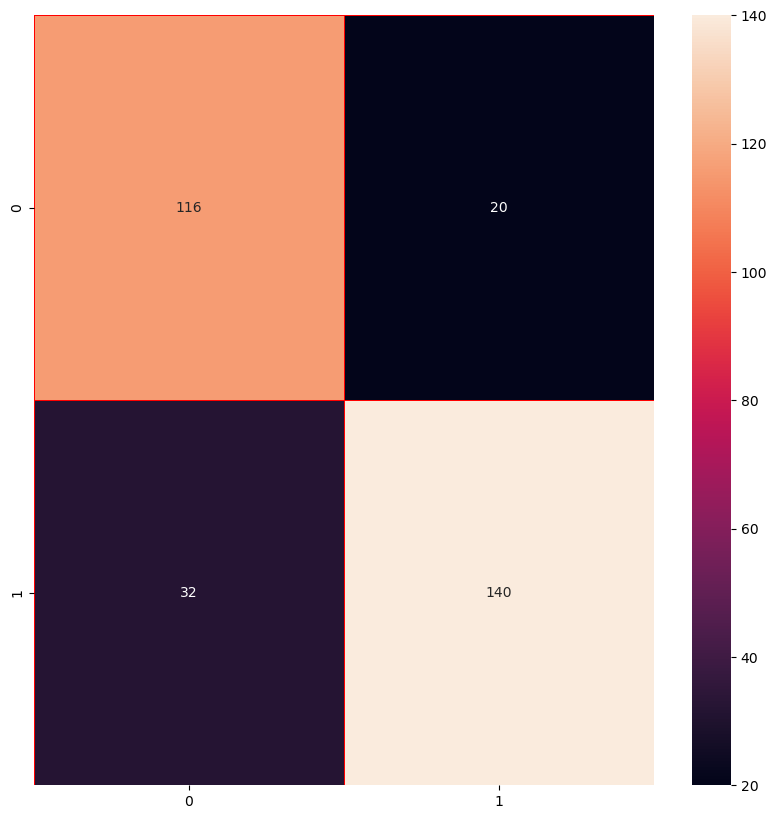

<Figure size 640x480 with 0 Axes>

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

In [29]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82       136
           1       0.88      0.81      0.84       172

    accuracy                           0.83       308
   macro avg       0.83      0.83      0.83       308
weighted avg       0.83      0.83      0.83       308



# Hyperparameter tuning

## Choosing a K Value


In [30]:
error_rate = []

# Will take some time
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

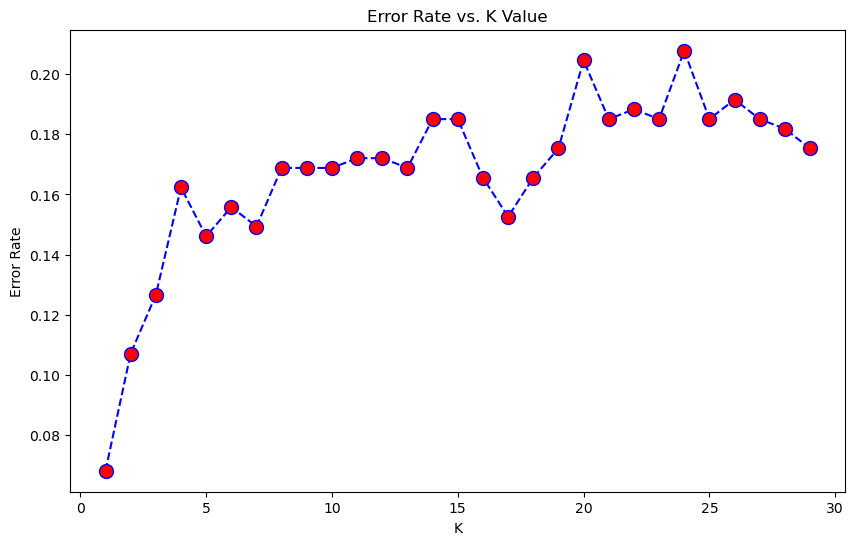

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [32]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[129   7]
 [ 14 158]]


              precision    recall  f1-score   support

           0       0.90      0.95      0.92       136
           1       0.96      0.92      0.94       172

    accuracy                           0.93       308
   macro avg       0.93      0.93      0.93       308
weighted avg       0.93      0.93      0.93       308



In [33]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[108  28]
 [ 27 145]]


              precision    recall  f1-score   support

           0       0.80      0.79      0.80       136
           1       0.84      0.84      0.84       172

    accuracy                           0.82       308
   macro avg       0.82      0.82      0.82       308
weighted avg       0.82      0.82      0.82       308



## Tuning n_neighbors

In [34]:
n_neighbours_values = list(range(1, 31))
accuracy_train_values = []
accuracy_val_values = []

for n_neighbours in n_neighbours_values:
    model = KNeighborsClassifier(n_neighbors = n_neighbours)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_val = accuracy_score(y_val, y_pred_val)
    accuracy_train_values.append(accuracy_train)
    accuracy_val_values.append(accuracy_val)
    
results = pd.DataFrame({
    'n_neighbours': n_neighbours_values,
    'accuracy_train': accuracy_train_values,
    'accuracy_val': accuracy_val_values
})

In [35]:
results

,n_neighbours,accuracy_train,accuracy_val
0,1,1.000000,0.935185
1,2,0.984032,0.912037
2,3,0.972056,0.884259
3,4,0.934132,0.875000
4,5,0.914172,0.842593
5,6,0.906188,0.856481
6,7,0.902196,0.856481
7,8,0.874251,0.847222
8,9,0.890220,0.851852
9,10,0.890220,0.856481


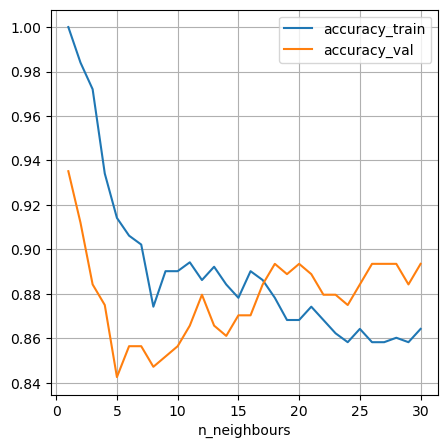

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

results.plot(x='n_neighbours', y=['accuracy_train', 'accuracy_val'], figsize=(5, 5))
plt.grid(axis='both')

According to the previous plot, we select `n_neighbours = 23` as the best value for `n_neighbours`

In [37]:
weights_values = ['uniform', 'distance']
accuracy_train_values = []
accuracy_val_values = []

for weights in weights_values:
    model = KNeighborsClassifier(n_neighbors=10, weights=weights)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_val = accuracy_score(y_val, y_pred_val)
    accuracy_train_values.append(accuracy_train)
    accuracy_val_values.append(accuracy_val)
    
results = pd.DataFrame({
    'weights': weights_values,
    'accuracy_train': accuracy_train_values,
    'accuracy_val': accuracy_val_values
})

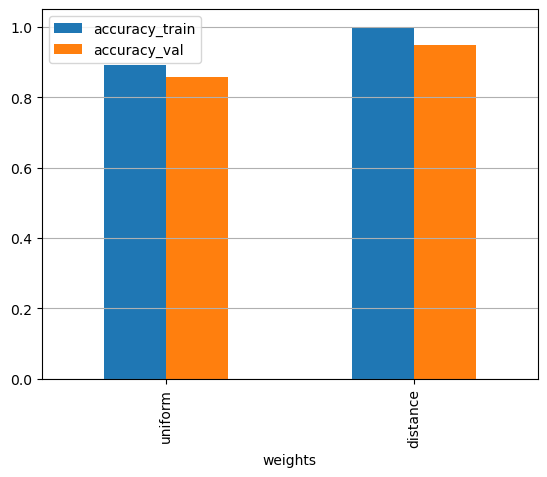

In [38]:
results.plot.bar(x='weights', y=['accuracy_train', 'accuracy_val'])
plt.grid(axis='y')

In [39]:
explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test)

Permutation explainer: 309it [05:26,  1.08s/it]                         


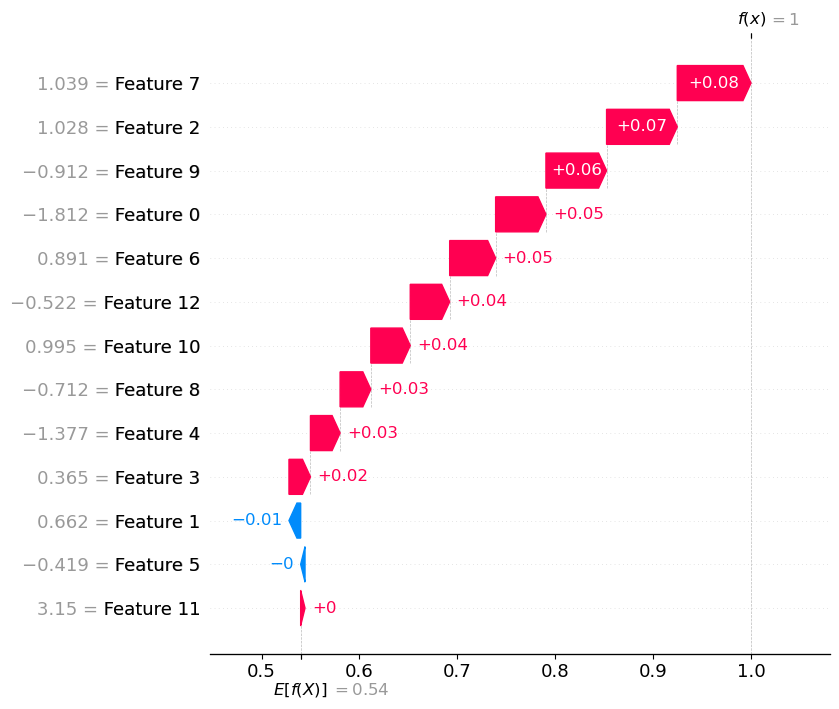

In [40]:
shap.plots.waterfall(shap_values[0], max_display=16)

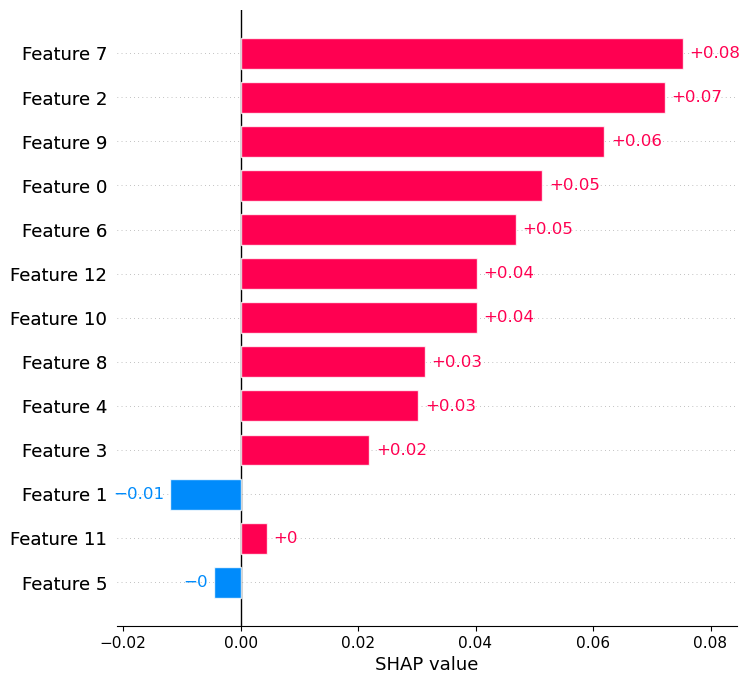

In [41]:
shap.plots.bar(shap_values[0], max_display=14)

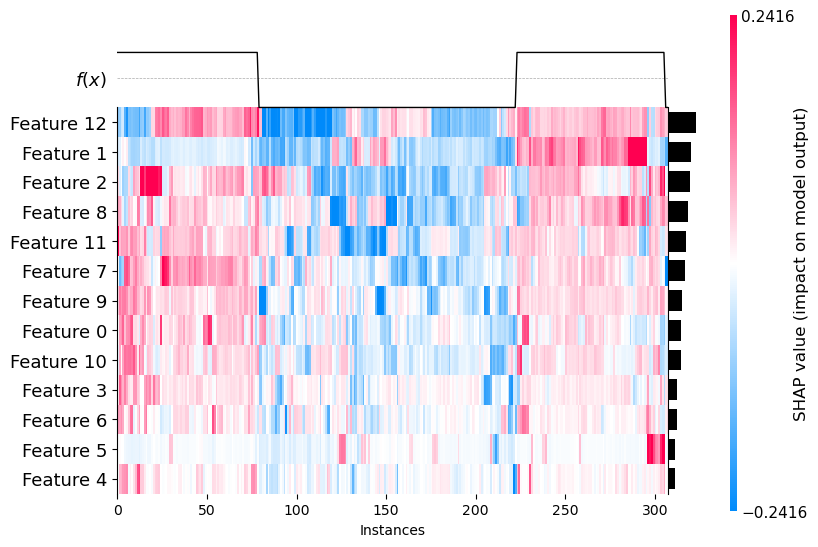

In [42]:
shap.plots.heatmap(shap_values, max_display=16)

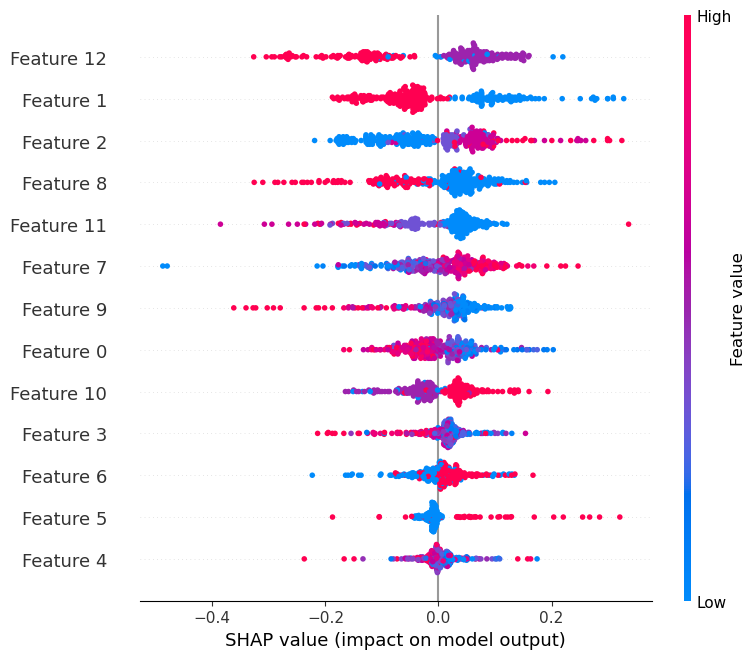

In [43]:
shap.summary_plot(shap_values)

## 2-NAIVE BAISE CLASSIFIER 

In [44]:
X = data.iloc[:,:-1 ]
y = data.iloc[:, -1]
print(X)
print(y)
X.head()

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


# Splitting the dataset into the Training set and Test set

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train.shape
X_test.shape

(257, 13)

# Feature Scaling

In [46]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

print (X_train)

[[ 1.3756016   0.64371161 -0.92094523 ... -0.66196846  2.16167937
  -0.52198613]
 [-0.50461767  0.64371161 -0.92094523 ... -0.66196846 -0.73565005
   1.09448705]
 [ 1.15439933  0.64371161  1.98570929 ... -0.66196846  0.23012642
  -0.52198613]
 ...
 [ 1.15439933  0.64371161  1.98570929 ... -0.66196846  0.23012642
  -0.52198613]
 [ 1.3756016   0.64371161 -0.92094523 ... -0.66196846 -0.73565005
  -0.52198613]
 [ 0.60139366  0.64371161  1.01682445 ... -0.66196846 -0.73565005
  -0.52198613]]


# Training the Naive Bayes model on the Training set

In [47]:

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB()

# Predicting the Test set results

In [48]:
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 96  27]
 [ 13 121]]


In [50]:
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8443579766536965


In [51]:
from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred ))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83       123
           1       0.82      0.90      0.86       134

    accuracy                           0.84       257
   macro avg       0.85      0.84      0.84       257
weighted avg       0.85      0.84      0.84       257



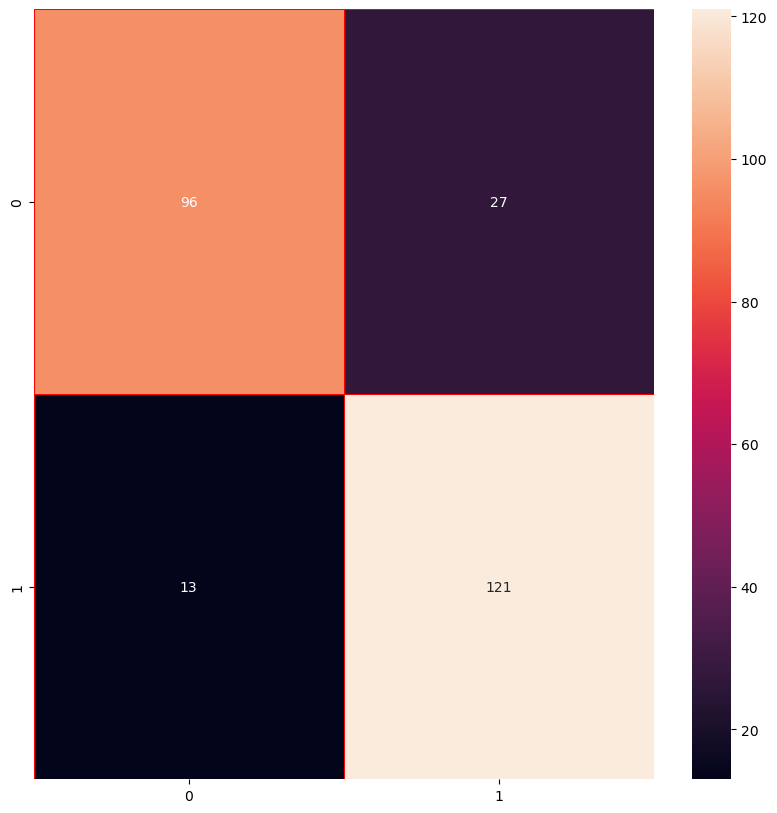

<Figure size 640x480 with 0 Axes>

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

In [53]:
explainer = shap.Explainer(classifier.predict, X_test)
shap_values = explainer(X_test)

Permutation explainer: 258it [00:12,  6.16it/s]                         


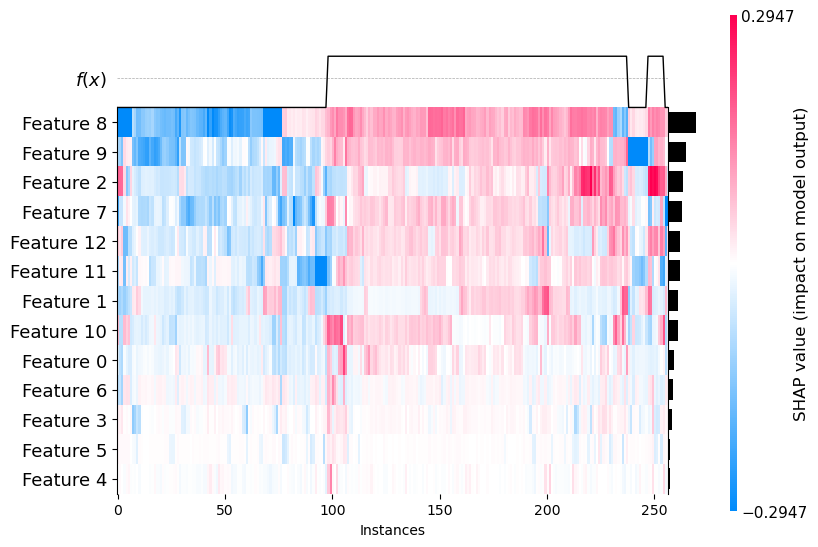

In [56]:
shap.plots.heatmap(shap_values, max_display=16)

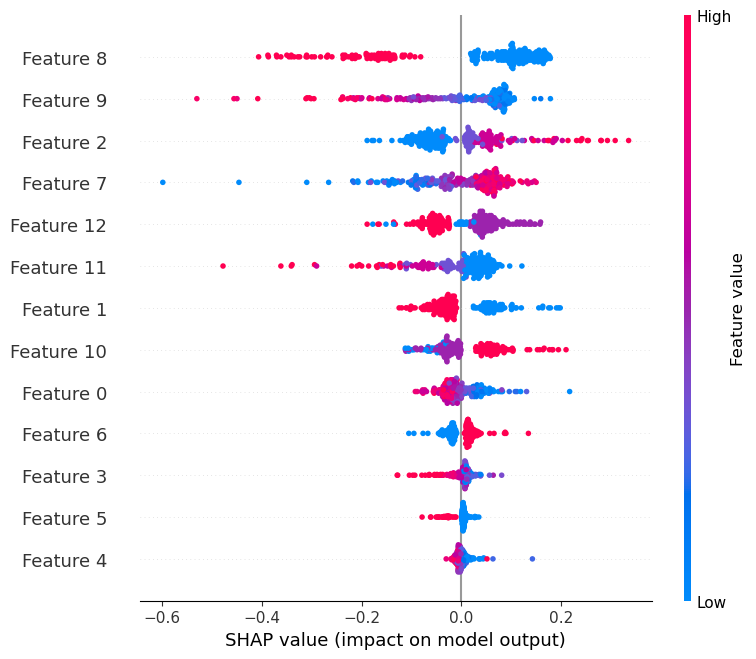

In [57]:
shap.summary_plot(shap_values)

## .....................................................................................

## LR Classifier 

# Splitting dataset into input and output

In [58]:
data_input = data.drop(columns=['target'])
data_output = data['target']

# Splitting dataset into train, validation, and test

In [59]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(data_input, data_output, test_size=0.30, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=0)

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('------------------------')
print('X_val:', X_val.shape)
print('y_val:', y_val.shape)
print('------------------------')
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (501, 13)
y_train: (501,)
------------------------
X_val: (216, 13)
y_val: (216,)
------------------------
X_test: (308, 13)
y_test: (308,)


# Helper function: Evaluate model

In [60]:
from sklearn.metrics import accuracy_score

def eval_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    return acc_train, acc_val

# Logistic Regression
- Logistic regression is a linear classifier
- Logistic regression requires feature scaling (StandardScaler) in order to converge

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

model = Pipeline([
    ('feature_scaling', StandardScaler()),
    ('logistic_regression', LogisticRegression(random_state=0))
])
eval_model(model, X_train, y_train, X_val, y_val)

(0.844311377245509, 0.8518518518518519)

# Hyperparameter tuning: C
The C hyperparameter is a regularization hyperparameter. It usually (but not always) has the following effect:
1. Smaller values for C:
    - High regularization
    - Reduces overfitting
    - But too small values can make accuracy very low
2. Larger values for C:
    - Low regularization
    - High training accuracy
    - Can lead to overfitting

In [62]:
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
acc_train_values = []
acc_val_values = []

for C in C_values:
    model = Pipeline([
        ('feature_scaling', StandardScaler()),
        ('logistic_regression', LogisticRegression(C=C, random_state=0))
    ])
    acc_train, acc_val = eval_model(model, X_train, y_train, X_val, y_val)
    acc_train_values.append(acc_train)
    acc_val_values.append(acc_val)

results = pd.DataFrame({
    'C': C_values,
    'acc_train': acc_train_values,
    'acc_val': acc_val_values
})

results

,C,acc_train,acc_val
0,0.0001,0.734531,0.731481
1,0.0010,0.806387,0.828704
2,0.0100,0.830339,0.842593
3,0.1000,0.840319,0.847222
4,1.0000,0.844311,0.851852
5,10.0000,0.844311,0.851852
6,100.0000,0.844311,0.851852
7,1000.0000,0.844311,0.851852
8,10000.0000,0.844311,0.851852


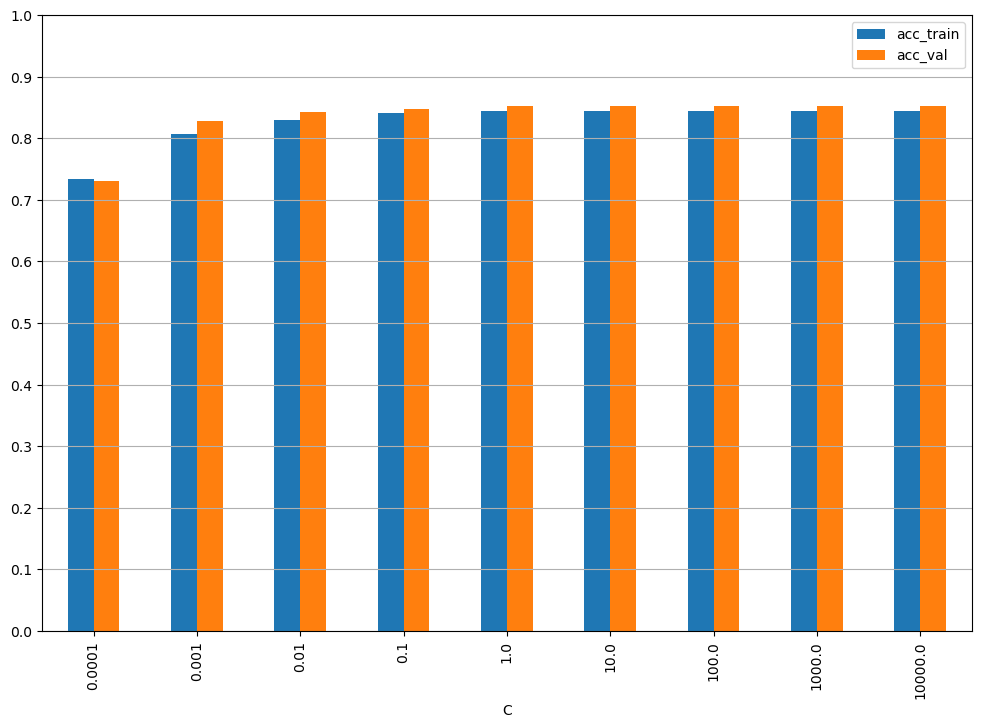

In [63]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

results.plot.bar(x='C', y=['acc_train', 'acc_val'], figsize=(12, 8))
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.grid(axis='y')
plt.show()

# Testing best model

In [64]:
model_best = Pipeline([
    ('feature_scaling', StandardScaler()),
    ('logistic_regression', LogisticRegression(C=0.0001, random_state=0))
])
model_best.fit(X_train, y_train)
y_pred_test = model_best.predict(X_test)
print(accuracy_score(y_test, y_pred_test))

0.7824675324675324


In [65]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_test)

array([[ 80,  65],
       [  2, 161]], dtype=int64)

In [66]:
from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred_test ))

              precision    recall  f1-score   support

           0       0.98      0.55      0.70       145
           1       0.71      0.99      0.83       163

    accuracy                           0.78       308
   macro avg       0.84      0.77      0.77       308
weighted avg       0.84      0.78      0.77       308



In [67]:
explainer = shap.Explainer(model_best.predict, X_test)
shap_values = explainer(X_test)

Permutation explainer: 309it [00:23,  7.42it/s]                         


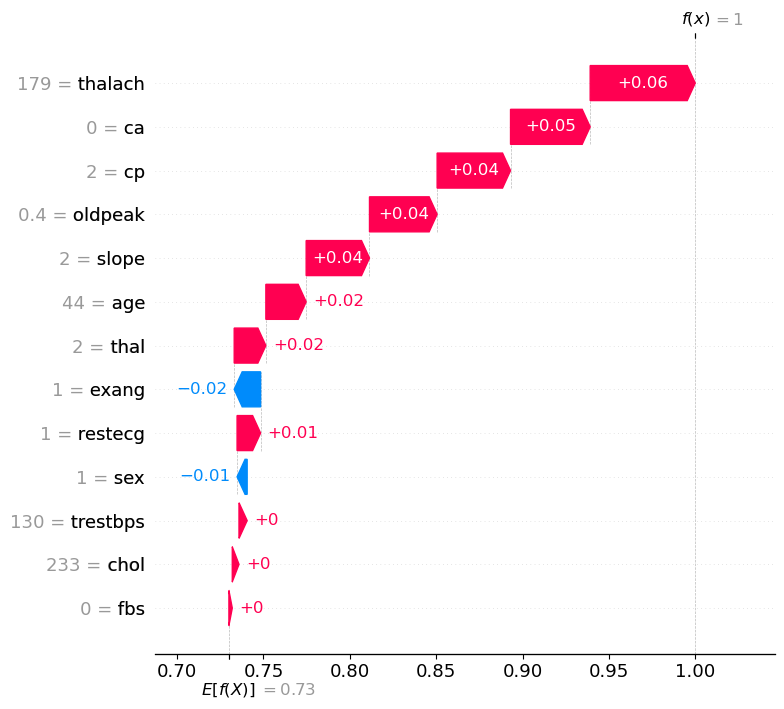

In [68]:
shap.plots.waterfall(shap_values[0], max_display=16)

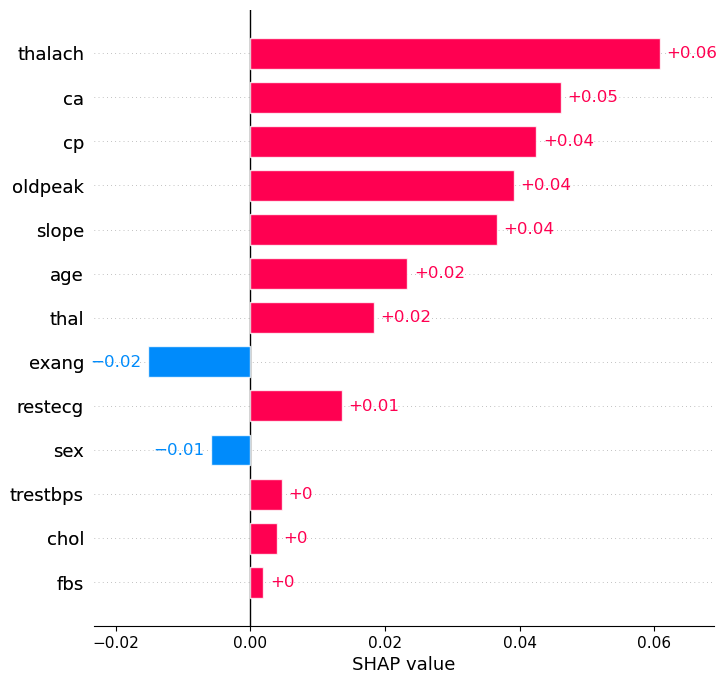

In [69]:
shap.plots.bar(shap_values[0], max_display=14)

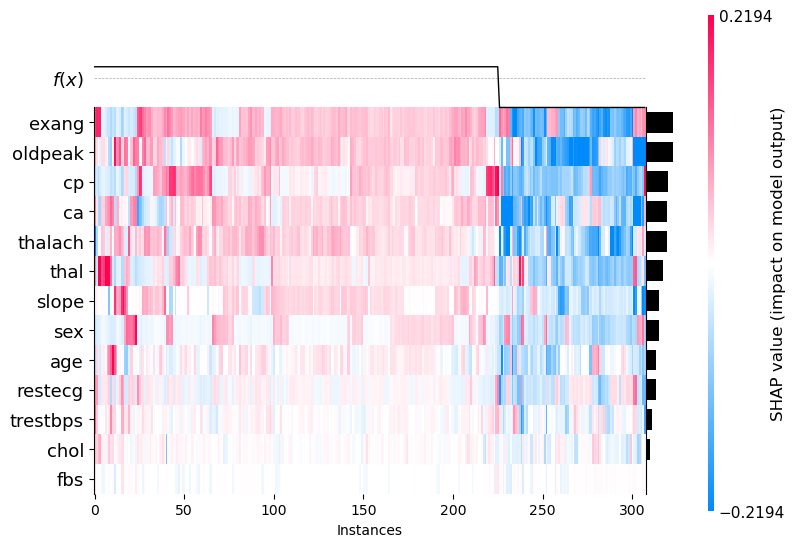

In [70]:
shap.plots.heatmap(shap_values, max_display=16)

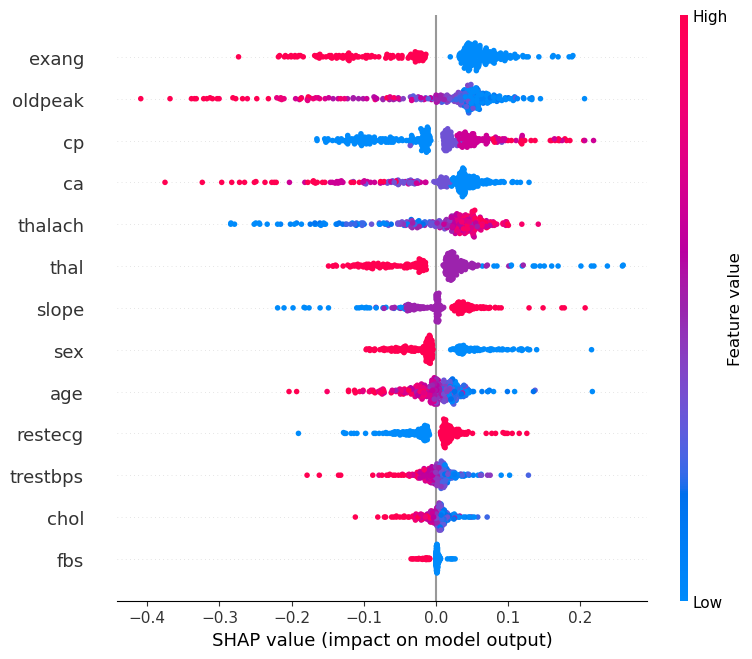

In [71]:
shap.summary_plot(shap_values)

## .......................................................................................................

# 4.Random Forest

In [72]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(data_input, data_output, test_size=0.30, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=0)

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('------------------------')
print('X_val:', X_val.shape)
print('y_val:', y_val.shape)
print('------------------------')
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (501, 13)
y_train: (501,)
------------------------
X_val: (216, 13)
y_val: (216,)
------------------------
X_test: (308, 13)
y_test: (308,)


In [73]:
RF = RandomForestClassifier()

In [74]:
params = {
    'n_estimators': [50, 100, 200, 500, 800],
    'n_jobs': [-1]
}

In [79]:
grid = GridSearchCV(estimator=RF,
                    param_grid=params,
                    cv=10,
                    n_jobs=1,
                    verbose=2)

In [80]:
grid.fit(X_train, y_train)

grid.best_score_, grid.best_params_

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] END .........................n_estimators=50, n_jobs=-1; total time=   3.8s
[CV] END .........................n_estimators=50, n_jobs=-1; total time=   0.1s
[CV] END .........................n_estimators=50, n_jobs=-1; total time=   0.1s
[CV] END .........................n_estimators=50, n_jobs=-1; total time=   0.1s
[CV] END .........................n_estimators=50, n_jobs=-1; total time=   0.1s
[CV] END .........................n_estimators=50, n_jobs=-1; total time=   0.1s
[CV] END .........................n_estimators=50, n_jobs=-1; total time=   0.1s
[CV] END .........................n_estimators=50, n_jobs=-1; total time=   0.1s
[CV] END .........................n_estimators=50, n_jobs=-1; total time=   0.1s
[CV] END .........................n_estimators=50, n_jobs=-1; total time=   0.1s
[CV] END ........................n_estimators=100, n_jobs=-1; total time=   0.3s
[CV] END ........................n_estimators=10

(0.9621176470588235, {'n_estimators': 200, 'n_jobs': -1})

In [81]:
SKF = StratifiedKFold(n_splits=5, random_state=9,shuffle=True)

In [82]:
DT = DecisionTreeClassifier(random_state=0)
params =  {
    'min_samples_leaf': [1, 2, 3],
    'max_depth': [1, 2, 3]
}

In [83]:
grid = GridSearchCV(estimator=DT,
                    param_grid=params,
                    cv=10,
                    n_jobs=1,
                    verbose=2)

In [84]:
grid.fit(X_train, y_train)

grid.best_score_, grid.best_params_

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....................max_depth=1, min_sa

(0.8181960784313725, {'max_depth': 3, 'min_samples_leaf': 1})

In [85]:
SV = SVC(random_state=0)

In [86]:
params = {'C': [0.125, 0.25,0.5, 1, 2], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','sigmoid','linear']} 

In [88]:
grid = GridSearchCV(estimator=SV,
                    param_grid=params,
                    cv=10,
                    n_jobs=1,
                    verbose=2)

In [89]:
grid.fit(X_train, y_train)

grid.best_score_, grid.best_params_

Fitting 10 folds for each of 75 candidates, totalling 750 fits
[CV] END .......................C=0.125, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.125, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.125, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.125, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.125, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.125, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.125, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.125, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.125, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.125, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.125, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=0.125, gamma=1, 

(0.9221960784313724, {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'})

In [90]:
SV = SVC(C=grid.best_params_['C'],gamma=grid.best_params_['gamma'],kernel=grid.best_params_['kernel'])

In [91]:
SV.fit(X_train, y_train)

SVC(C=1, gamma=0.1)

In [92]:
print(SV.score(X_train, y_train))

1.0


In [93]:
print(SV.score(X_test,y_test))

0.9285714285714286


In [94]:
y_pred_test = SV.predict(X_test)
print(accuracy_score(y_test, y_pred_test))

0.9285714285714286


In [95]:
print (classification_report(y_test,y_pred_test ))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       145
           1       0.88      1.00      0.94       163

    accuracy                           0.93       308
   macro avg       0.94      0.92      0.93       308
weighted avg       0.94      0.93      0.93       308

